In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
import csv
from collections import defaultdict

In [2]:
class Agent:
    def __init__(self, state_space, action_space, exploration_rate=0.1, learning_rate=0.01, discount_factor=0.9):
        self.state_space = state_space
        self.action_space = action_space
        self.exploration_rate = exploration_rate  # Exploration rate
        self.learning_rate = learning_rate      # Learning rate
        self.discount_factor = discount_factor  # Discount factor
        self.q_table = defaultdict(lambda: np.zeros(len(action_space)))

    def select_action(self, state):
        if random.uniform(0, 1) < self.exploration_rate:  # Exploration
            return random.choice(self.action_space)
        else:  # Exploitation
            return np.argmax(self.q_table[state])

    def update_q_value(self, state, action, reward, next_state):
        best_next_action = np.argmax(self.q_table[next_state])
        td_target = reward + self.discount_factor * self.q_table[next_state][best_next_action]
        td_error = td_target - self.q_table[state][action]
        self.q_table[state][action] += self.learning_rate * td_error

In [3]:
class GridEnvironment:
    def __init__(self, size=10, obstacles=None, goal=(9, 9)):
        self.size = size
        self.obstacles = obstacles if obstacles else [(3, 3), (4, 4), (5, 5), (6, 6)]
        self.goal = goal

    def get_next_state(self, state, action):
        x, y = state
        if action == 0:  # Up
            x -= 1
        elif action == 1:  # Down
            x += 1
        elif action == 2:  # Left
            y -= 1
        elif action == 3:  # Right
            y += 1
        
        # Boundary conditions
        x = max(0, min(self.size - 1, x))
        y = max(0, min(self.size - 1, y))

        next_state = (x, y)

        # Check for obstacles
        if next_state in self.obstacles:
            return state  # Remain in the same state

        return next_state

    def get_reward(self, state):
        if state == self.goal:
            return 20
        return -1

    def is_terminal(self, state):
        return state == self.goal

In [4]:
# This function runs a single-agent simulation over a specified number of episodes.
def run_single_agent_simulation(episodes, env, agent):
    total_rewards = []

    with open('single_agent_results.csv', 'w', newline='') as csvfile:
        writer = csv.writer(csvfile)
        writer.writerow(['Episode', 'Total Reward'])

        for episode in range(episodes):
            state = (0, 0)  # Starting position
            total_reward = 0

            while not env.is_terminal(state):
                action = agent.select_action(state)
                next_state = env.get_next_state(state, action)
                reward = env.get_reward(next_state)
                agent.update_q_value(state, action, reward, next_state)

                state = next_state
                total_reward += reward

            total_rewards.append(total_reward)
            writer.writerow([episode + 1, total_reward])

    return total_rewards

In [5]:
# This function runs a multi-agent simulation where each agent independently learns and collects rewards.
def run_multi_agent_simulation(episodes, env, agents):
    total_rewards_per_agent = [[] for _ in agents]

    with open('multi_agent_results.csv', 'w', newline='') as csvfile:
        writer = csv.writer(csvfile)
        writer.writerow(['Episode', 'Agent ID', 'Total Reward'])

        for episode in range(episodes):
            for agent_id, agent in enumerate(agents):
                state = (0, 0)  # Starting position
                total_reward = 0

                while not env.is_terminal(state):
                    action = agent.select_action(state)
                    next_state = env.get_next_state(state, action)
                    reward = env.get_reward(next_state)
                    agent.update_q_value(state, action, reward, next_state)
                    state = next_state
                    total_reward += reward

                # Ensure the total reward for each agent starts above -1000
                if total_reward < -1000:
                    total_reward = -1000

                total_rewards_per_agent[agent_id].append(total_reward)
                writer.writerow([episode + 1, agent_id, total_reward])

    return total_rewards_per_agent

In [6]:
# This function plots the total rewards for a single agent over all episodes.
def plot_results_single(total_rewards):
    plt.figure(figsize=(8, 6))
    plt.plot(total_rewards, label='Single Agent')
    plt.xlabel('Episodes')
    plt.ylabel('Total Reward')
    plt.title('Total Rewards per Episode (Single Agent)')
    plt.legend()
    plt.show()

In [7]:
# This function plots the total rewards for each agent in a multi-agent simulation over all episodes.
def plot_results_multi(total_rewards_per_agent):
    plt.figure(figsize=(8, 6))
    for agent_id, rewards in enumerate(total_rewards_per_agent):
        plt.plot(rewards, label=f'Agent {agent_id}')
    plt.xlabel('Episodes')
    plt.ylabel('Total Reward')
    plt.title('Total Rewards per Episode (Multi-Agent)')
    plt.legend()
    plt.show()

# Parameters
grid_size = 10
actions = [0, 1, 2, 3]  # Up, Down, Left, Right

Running Single Agent Simulation...


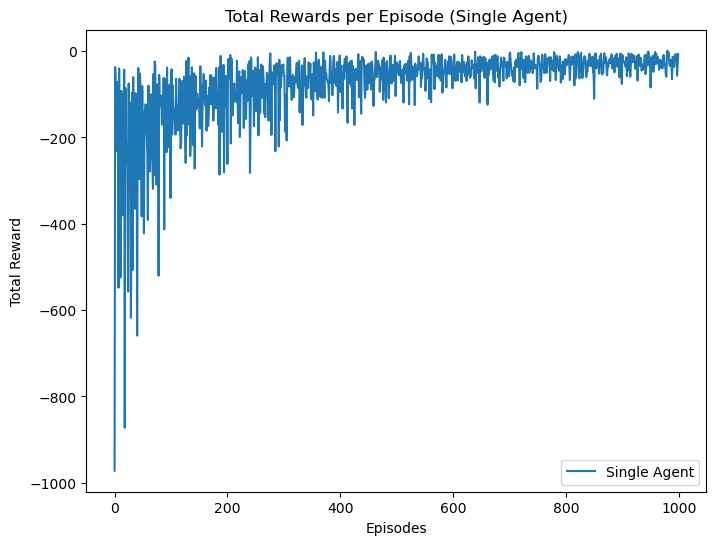

In [8]:
# Single Agent Simulation
env = GridEnvironment(size=grid_size)
agent = Agent(state_space=(grid_size, grid_size), action_space=actions)

print("Running Single Agent Simulation...")
total_rewards_single = run_single_agent_simulation(episodes=1000, env=env, agent=agent)
plot_results_single(total_rewards_single)


Running Multi-Agent Simulation...


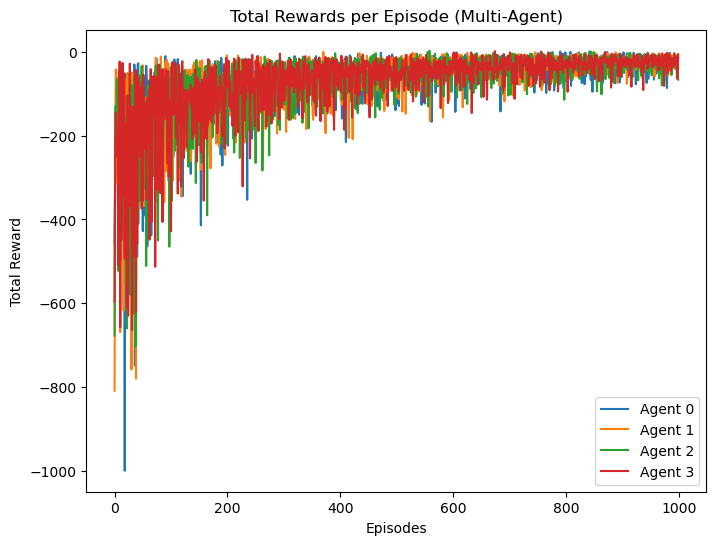

In [9]:
# Multi-Agent Simulation
print("\nRunning Multi-Agent Simulation...")
agents = [Agent(state_space=(grid_size, grid_size), action_space=actions) for _ in range(4)]
total_rewards_multi = run_multi_agent_simulation(episodes=1000, env=env, agents=agents)
plot_results_multi(total_rewards_multi)